# Analysis and Visualization

Required files: 
* `data/decays.csv`
* `data/many_decays.csv`

## Steps of Data Preparation

1. Load the data.
    * possibly convert into different storage format
    * Transform the data into an easy-access data structure (e.g. NumPy arrays, Pandas data frames)
2. Clean the data.
    * Handle missing values
        - e.g. drop values or replace with defaults, etc. 
    * Fix erroneous entries
        - e.g. detect errors, sort, standardize formats
    * Handle stylistic issues
        - e.g. rename fields, reformat irregular dates, times, numbers, strings, etc.
3. Combine data with metadata.
    * add additional/external data
    * add identifying numbers, dates
    * merge results from independent detectors/sensors, etc.
    
Then continue with analysis and visualization.

## A few  useful Python Packages
### NumPy

In [1]:
import numpy as np
decays_arr = np.loadtxt('data/decays.csv', delimiter=",", skiprows=1)
decays_arr

array([[  0.00000000e+00,   1.00000000e+01],
       [  1.00000000e+00,   1.35335283e+00],
       [  2.00000000e+00,   1.83156389e-01],
       [  3.00000000e+00,   2.47875220e-02],
       [  4.00000000e+00,   3.35462600e-03],
       [  5.00000000e+00,   4.53999000e-04],
       [  6.00000000e+00,   6.14420000e-05],
       [  7.00000000e+00,   8.31500000e-06],
       [  8.00000000e+00,   1.12600000e-06],
       [  9.00000000e+00,   1.52000000e-07]])

### Pandas

In [2]:
import pandas as pd
decays_df = pd.read_csv('data/decays.csv') 
decays_df

,Time (s),Decays (#)
0,0,1.000000e+01
1,1,1.353353e+00
2,2,1.831564e-01
3,3,2.478752e-02
4,4,3.354626e-03
5,5,4.539990e-04
6,6,6.144200e-05
7,7,8.315000e-06
8,8,1.126000e-06
9,9,1.520000e-07


Pandas can convert directly to HDF5 format (Chapter 10)

```python
decays_df.to_hdf('decays.h5', 'experimental')
```

### Blaze

The Blaze ecosystem is a set of libraries that help users store, describe, query and process data. 
It provides Python users high-level access to efficient computation on inconveniently large data. Blaze can refer to both a particular library as well as an ecosystem of related projects that have spun off of Blaze development.

* <http://blaze.pydata.org/>
* <http://blaze.readthedocs.io>

```python
import blaze as bz
csv_data = bz.CSV('data/decays.csv')
decays_bz = bz.data(csv_data)
print(decays_bz.peek())
```

```
   Time (s)    Decays (#)
0         0  1.000000e+01
1         1  1.353353e+00
2         2  1.831564e-01
3         3  2.478752e-02
4         4  3.354626e-03
5         5  4.539990e-04
6         6  6.144200e-05
7         7  8.315000e-06
8         8  1.126000e-06
9         9  1.520000e-07
```

**In this chapter will work primarily with NumPy and Pandas for handling data**

## Working With Pandas

* Pandas Homepage: <http://pandas.pydata.org/>
* Pandas Documentation: <http://pandas.pydata.org/pandas-docs/stable/>
* [Pandas Cheat Sheet.pdf](https://github.com/pandas-dev/pandas/raw/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

### A first look at Pandas

The file `many_decays.csv` contains 51 lines (one header, 50 lines of data) as comma-separated values:

```
Time,Decays
2014-11-08T05:19:31.561782,10.0
2014-11-08T05:19:32.561782,1.35335283237
2014-11-08T05:19:33.561782,0.183156388887
[...]
2014-11-08T05:19:45.561782,6.91440010694e-12
2014-11-08T05:19:46.561782,9.35762296884e-13
2014-11-08T05:19:47.561782,2
2014-11-08T05:19:49.561782,2
[...]
2014-11-08T05:19:55.561782,2
2014-11-08T05:19:56.561782,1.92874984796e-21
2014-11-08T05:19:57.561782,2.61027906967e-22
2014-11-08T05:19:58.561782,3.5326285722e-23
[...]
2014-11-08T05:20:10.561782,1.3336148155e-33
2014-11-08T05:20:11.561782,1.80485138785e-34
2014-11-08T05:20:12.561782,NaN
2014-11-08T05:20:13.561782,NaN
2014-11-08T05:20:14.561782,NaN
2014-11-08T05:20:15.561782,NaN
2014-11-08T05:20:16.561782,8.19401262399e-39
[...]
```

#### Loading data into pandas.DataFrame

We can load this data into a **DataFrame** using `pandas.read_csv()` function:

In [3]:
import pandas as pd
decay_df = pd.read_csv("data/many_decays.csv")

#### Inspecting and summarizing the data

The `DataFrame.head()` function displays the first entries of the data frame:

In [4]:
decay_df.head()

,Time,Decays
0,2014-11-08T05:19:31.561782,10.000000
1,2014-11-08T05:19:32.561782,1.353353
2,2014-11-08T05:19:33.561782,0.183156
3,2014-11-08T05:19:34.561782,0.024788
4,2014-11-08T05:19:35.561782,0.003355


Pandas has found two columns and interprets the first line as column headers. Pandas also automatically creates row-indices.

The `DataFrame.describe()` function calculates basic descriptive statistics for each column containing numeric data:

In [5]:
decay_df.describe()

,Decays
count,4.600000e+01
mean,6.427212e-01
std,1.625242e+00
min,2.748785e-42
25%,7.629417e-29
50%,2.900265e-11
75%,1.435642e-01
max,1.000000e+01


DataFrames can show us some more useful information:

In [6]:
decay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
Time      50 non-null object
Decays    46 non-null float64
dtypes: float64(1), object(1)
memory usage: 880.0+ bytes


In [7]:
decay_df.count()

Time      50
Decays    46
dtype: int64

### Cleaning and Munging Data

Reald world data often contains gaps (i.e. missing values) or out of range values that can be attributed to external factors and for some reason should be excluded from further analysis.

In [8]:
decay_df = pd.read_csv("data/many_decays.csv")
decay_df.count()

Time      50
Decays    46
dtype: int64

In [9]:
print(decay_df)

                          Time        Decays
0   2014-11-08T05:19:31.561782  1.000000e+01
1   2014-11-08T05:19:32.561782  1.353353e+00
2   2014-11-08T05:19:33.561782  1.831564e-01
3   2014-11-08T05:19:34.561782  2.478752e-02
4   2014-11-08T05:19:35.561782  3.354626e-03
5   2014-11-08T05:19:36.561782  4.539993e-04
6   2014-11-08T05:19:37.561782  6.144212e-05
7   2014-11-08T05:19:38.561782  8.315287e-06
8   2014-11-08T05:19:39.561782  1.125352e-06
9   2014-11-08T05:19:40.561782  1.522998e-07
10  2014-11-08T05:19:41.561782  2.061154e-08
11  2014-11-08T05:19:42.561782  2.789468e-09
12  2014-11-08T05:19:43.561782  3.775135e-10
13  2014-11-08T05:19:44.561782  5.109089e-11
14  2014-11-08T05:19:45.561782  6.914400e-12
15  2014-11-08T05:19:46.561782  9.357623e-13
16  2014-11-08T05:19:47.561782  2.000000e+00
17  2014-11-08T05:19:48.561782  2.000000e+00
18  2014-11-08T05:19:49.561782  2.000000e+00
19  2014-11-08T05:19:50.561782  2.000000e+00
20  2014-11-08T05:19:51.561782  2.000000e+00
21  2014-1

### Plotting with Pandas

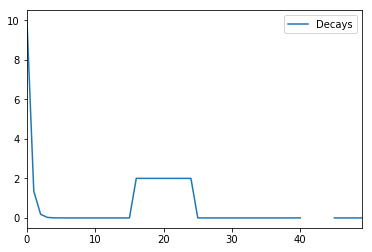

In [10]:
# allow matplotlib to embed plots in the notebook:
%matplotlib inline
#plot the dataframe
decay_df.plot()

The file "many_decays.csv" has four missing values (**NaN** - Not a Number) and nine outliers with value "2.000000e+00".

If we wish to just drop these entries, we can do so using Panda's `DataFrame.dropna()` function:

In [11]:
decay_df.dropna()

,Time,Decays
0,2014-11-08T05:19:31.561782,1.000000e+01
1,2014-11-08T05:19:32.561782,1.353353e+00
2,2014-11-08T05:19:33.561782,1.831564e-01
3,2014-11-08T05:19:34.561782,2.478752e-02
4,2014-11-08T05:19:35.561782,3.354626e-03
5,2014-11-08T05:19:36.561782,4.539993e-04
6,2014-11-08T05:19:37.561782,6.144212e-05
7,2014-11-08T05:19:38.561782,8.315287e-06
8,2014-11-08T05:19:39.561782,1.125352e-06
9,2014-11-08T05:19:40.561782,1.522998e-07


#### How to deal with the outliers?

In this example the outliers were caused by some external radiation source that moved though the room.
We decided to remove them.

#### Pandas can also do "Fancy indexing"
In this case we want to identify all datapoints with the value `2.0` and replace them with `NaN` values.

In [12]:
decay_df[ decay_df['Decays'] == 2.0 ]

,Time,Decays
16,2014-11-08T05:19:47.561782,2.0
17,2014-11-08T05:19:48.561782,2.0
18,2014-11-08T05:19:49.561782,2.0
19,2014-11-08T05:19:50.561782,2.0
20,2014-11-08T05:19:51.561782,2.0
21,2014-11-08T05:19:52.561782,2.0
22,2014-11-08T05:19:53.561782,2.0
23,2014-11-08T05:19:54.561782,2.0
24,2014-11-08T05:19:55.561782,2.0


In [13]:
decay_df[ decay_df['Decays'] == 2.0 ] = np.NaN

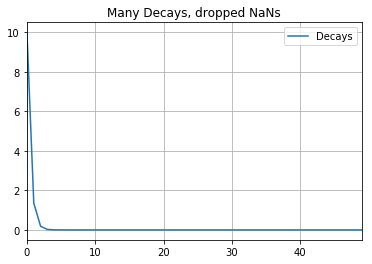

In [14]:
# drop NaN values from DataFrame and plot with title and grid:
decay_df.dropna().plot(title="Many Decays, dropped NaNs", grid=True )

### Plotting with Matplotlib / Pylab

Pandas uses Matplotlib as it's underlying plotting library.
Matplotlib contains the `pylab` package, which provides commands that are very similar to the plotting functionality present in MATLAB.

* Matplotlib Homepage:    <http://matplotlib.org/>
* Matplotlib Gallery:     <http://matplotlib.org/gallery.html>
* Pylab commands summary: <http://matplotlib.org/api/pyplot_summary.html#>


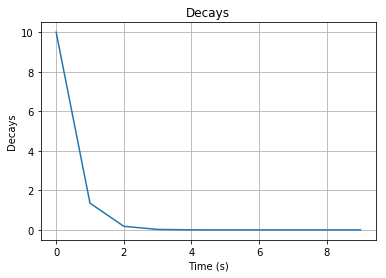

In [15]:
import numpy as np

# as in the previous example, load decays.csv into a NumPy array
decaydata = np.loadtxt('data/decays.csv', delimiter=",", skiprows=1)

# provide handles for the x and y columns
time = decaydata[:,0]
decays = decaydata[:,1]

# import the matplotlib plotting functionality
import matplotlib
%matplotlib inline
import pylab as plt

plt.plot(time, decays)

plt.xlabel('Time (s)')
plt.ylabel('Decays')
plt.title('Decays')
plt.grid(True)
#plt.savefig("decays_matplotlib.png")

Matplotlib is much more powerful that the above example. 

The example below is based on a polar plot with 20 angular wedges and annotations:

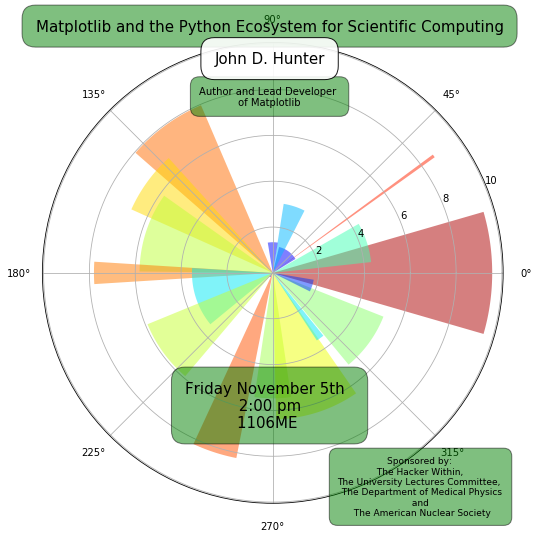

In [16]:
# Import various necessary Python and matplotlib packages
import numpy as np
import matplotlib.cm as cm
from matplotlib.pyplot import figure, show, rc
from matplotlib.patches import Ellipse

# Create a square figure on which to place the plot
fig = figure(figsize=(8,8))

# Create square axes to hold the circular polar plot
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)

# Generate 20 colored, angular wedges for the polar plot
N = 20
theta = np.arange(0.0, 2*np.pi, 2*np.pi/N)
radii = 10*np.random.rand(N)
width = np.pi/4*np.random.rand(N)
bars = ax.bar(theta, radii, width=width, bottom=0.0)
for r,bar in zip(radii, bars):
    bar.set_facecolor(cm.jet(r/10.))
    bar.set_alpha(0.5)

# Using dictionaries, create a color scheme for the text boxes
bbox_args = dict(boxstyle="round, pad=0.9", fc="green", alpha=0.5)
bbox_white = dict(boxstyle="round, pad=0.9", fc="1", alpha=0.9)
patch_white = dict(boxstyle="round, pad=1", fc="1", ec="1")

# Create various boxes with text annotations in them at specific
# x and y coordinates
ax.annotate('Matplotlib and the Python Ecosystem for Scientific Computing',
    xy=(.5,.95),
    xycoords='figure fraction',
    xytext=(0, 0), textcoords='offset points',
    size=15,
    ha="center", va="center",
    bbox=bbox_args)

ax.annotate('Author and Lead Developer \n of Matplotlib ',
    xy=(.5,.82),
    xycoords='figure fraction',
    xytext=(0, 0), textcoords='offset points',
    ha="center", va="center",
    bbox=bbox_args)

ax.annotate('John D. Hunter',
    xy=(.5,.89),
    xycoords='figure fraction',
    xytext=(0, 0), textcoords='offset points',
    size=15,
    ha="center", va="center",
    bbox=bbox_white)

ax.annotate('Friday November 5th  \n 2:00 pm \n1106ME ',
    xy=(.5,.25),
    xycoords='figure fraction',
    xytext=(0, 0), textcoords='offset points',
    size=15,
    ha="center", va="center",
    bbox=bbox_args)

ax.annotate('Sponsored by: \n The Hacker Within, \n'
    'The University Lectures Committee, \n The Department of '
    'Medical Physics\n and \n The American Nuclear Society',
    xy=(.78,.1),
    xycoords='figure fraction',
    xytext=(0, 0), textcoords='offset points',
    size=9,
    ha="center", va="center",
    bbox=bbox_args)

#fig.savefig("plot.pdf")

### Plotting with Bokeh

* Bokeh Homepage/Documentation: <http://bokeh.pydata.org/en/latest/>
* Bokeh Gallery: <http://bokeh.pydata.org/en/latest/docs/gallery.html#gallery>
* Bokeh in Notebooks (Gallery): <http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/index.ipynb>


In [17]:
import numpy as np
# import the Bokeh plotting tools
from bokeh import plotting as bp

# as in the matplotlib example, load decays.csv into a NumPy array
decaydata = np.loadtxt('data/decays.csv',delimiter=",",skiprows=1)

# provide handles for the x and y columns
time = decaydata[:,0]
decays = decaydata[:,1]

# define some output file metadata
bp.output_file("decays.html", title="Experiment 1 Radioactivity")

# create a figure with fun Internet-friendly features (optional)
p = bp.figure(tools="pan,wheel_zoom,box_zoom,reset,previewsave",
              title="Decays", x_axis_label="Time (s)", y_axis_label="Decays (#)" )

# on that figure, create a line plot
p.line(time, decays, color='#1F78B4', legend='Decays per second' )

# additional customization to the figure can be specified separately
p.grid.grid_line_alpha=0.3

# open a browser
bp.show(p)

Bokeh can also embed the plot in the notebook:

In [18]:
bp.reset_output()    # disable previous output_file()
bp.output_notebook()

Loading BokehJS ...

In [19]:
# Same plot as before
p = bp.figure( tools="pan,wheel_zoom,box_zoom,reset,previewsave", title="Decays", 
               x_axis_label="Time (s)", y_axis_label="Decays (#)" )
p.line(time, decays, color='#1F78B4', legend='Decays per second' )
p.grid.grid_line_alpha=0.3
bp.show(p)